In [1]:
import pandas as pd
import json
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

In [2]:
with open('dynamic_log_icra2024_3trees_deletion_smalltrees.json') as f:
    data = json.load(f)
    
df = pd.json_normalize(data)
df.columns = df.columns.str.replace('.*(?=\.).','',regex=True)
df['planner'] = df['planner'].replace({
    'dynamic_planner_fre': 'Full reorder',
    'dynamic_planner_lci': 'Our method',
    'dynamic_planner_initial_orbit': 'Initial orbit'
})
df['Length/Visited'] = df['total_path_length'] / df['n_visited']
df['p_given'] = df['n_given'] / df['n_total']
df['p_given'] = (df['p_given']*4.0).round() / 4.0
df['p_discoverable'] = df['n_discoverable'] / df['n_total']
df['p_discoverable'] = (df['p_discoverable']*4.0).round() / 4.0
df['p_false'] = df['n_false'] / df['n_total']
df['p_false'] = (df['p_false'] * 4.0).round() / 4.0
df['% visited'] = (df['n_visited'] / (df['n_given'] + df['n_discoverable']))

In [3]:
norm_value = df[(df['planner'] == 'Our method') & (df['p_given'] == 1.0)][['tree_model','Length/Visited']].groupby('tree_model').mean()
df = df.merge(norm_value, left_on='tree_model', right_index=True, how='left', suffixes=('', ' (normalized)'))
df['Length/Visited (Normalized)'] = df['Length/Visited'] / df['Length/Visited (normalized)']
df_nofalse = df[df['n_false'] == 0]
df_false = df[(df['p_given'] == 0.5) | (df['p_given'] == 0.0)]

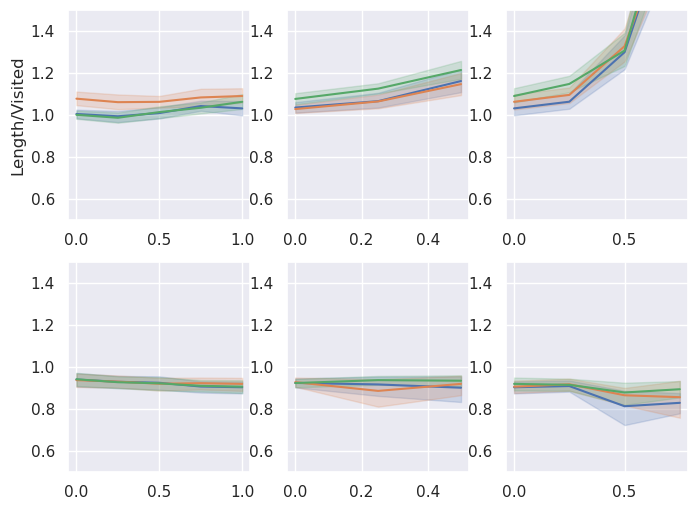

In [12]:
fig, axes = plt.subplots(2,3, figsize=(8,6))

metrics = ['Length/Visited (Normalized)','% visited']

ax_row = axes[0]

for (metric,ax_row) in zip(metrics, axes):

    sns.lineplot(data=df[df['n_false'] == 0], x='p_discoverable', y=metric, hue='planner', ax=ax_row[0], legend=False)
    ax_row[0].set_ylim(0.5,1.5)

    sns.lineplot(data=df[df['p_given'] == 0.5], x='p_false', y=metric, hue='planner', ax=ax_row[1], legend=False)
    ax_row[1].set_ylim(0.5,1.5)

    sns.lineplot(data=df[df['p_given'] == 0.0], x='p_false', y=metric, hue='planner', ax=ax_row[2], legend=False)
    ax_row[2].set_ylim(0.5,1.5)
    
for ax_row in axes:
    for ax in ax_row:
        ax.set_xlabel('')
        ax.set_ylabel('')
        
axes[0,0].set_ylabel('Length / Visited')
axes[0,0].set_ylabel('Length / Visited')
    
plt.savefig('plots_combined.pdf')